<a href="https://colab.research.google.com/github/victorap201/UFC-Stats/blob/main/UFC_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/UFC_Logo.svg/1200px-UFC_Logo.svg.png" width="400">

We have a database of 4111 fighters with different characteristics.

We are going to answer the following questions:

   1. Number of fighters per category?
   2. What is the predominant Stance in each division?
   3. What is the average height in each division?
   4. Relationship between significant strikes landed and absorbed per minute by division (average)
   5. Relationship between takedown accuracy and takedown defense by division (average)
   6. What are the characteristics of fighters with more than 20 victories?
   7. Relationship between Stance and significant strikes accuracy
   8. Which stance has the most victories in the Semiheavyweight division?
   9. Relationship between reach and significant strikes accuracy by division (average)


# Importing data

In [ ]:
# Import librery

import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data

df=pd.read_excel("/content/ufc-stats.xlsx")
df.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,0.00,Orthodox,1981-10-05,0.00,0,0.00,0,7.32,100,0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,0.00,NaN,NaT,3.36,77,0.00,0,0.00,0,100,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,0.00,NaN,NaT,0.00,0,5.58,60,0.00,0,0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,0.00,NaN,NaT,1.40,33,1.40,75,0.00,0,100,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60,2.73,42,10.23,100,0,20.4


# Getting the data information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   name                                          4111 non-null   object        
 1   nickname                                      2257 non-null   object        
 2   wins                                          4111 non-null   int64         
 3   losses                                        4111 non-null   int64         
 4   draws                                         4111 non-null   int64         
 5   height_cm                                     4111 non-null   float64       
 6   weight_in_kg                                  4111 non-null   float64       
 7   reach_in_cm                                   4111 non-null   float64       
 8   stance                                        3288 non-null   object

# Cleaning the data

In [ ]:
# Filling empty places in columns (nickname, stance)

df[["nickname","stance"]] = df[["nickname","stance"]].fillna("Unknown")

In [ ]:
# Removing date_of_birth

df.drop("date_of_birth", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      4111 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     4111 non-null   float64
 6   weight_in_kg                                  4111 non-null   float64
 7   reach_in_cm                                   4111 non-null   float64
 8   stance                                        4111 non-null   object 
 9   significant_strikes_landed_per_minute         4111 non-null   f

In [ ]:
# Adding new column (division of categories)

conditions = [(df["weight_in_kg"]<=56.7),
              (df["weight_in_kg"]>56.7) & (df["weight_in_kg"]<=61.4),
              (df["weight_in_kg"]>61.4) & (df["weight_in_kg"]<=65.8),
              (df["weight_in_kg"]>65.8) & (df["weight_in_kg"]<=70.3),
              (df["weight_in_kg"]>70.3) & (df["weight_in_kg"]<=77.1),
              (df["weight_in_kg"]>77.1) & (df["weight_in_kg"]<=83.9),
              (df["weight_in_kg"]>83.9) & (df["weight_in_kg"]<=93),
              (df["weight_in_kg"]>93) & (df["weight_in_kg"]<=120.2)]

values = ["Flyweight", "Bantamweight", "Featherweight", "Lightweight",
          "Welterweight", "Middleweight", "Semiheavyweight", "Heavyweight"]

df["Division"] = np.select(conditions, values, default="Open_weight")

# Questions

## 1. Number of fighters per category?



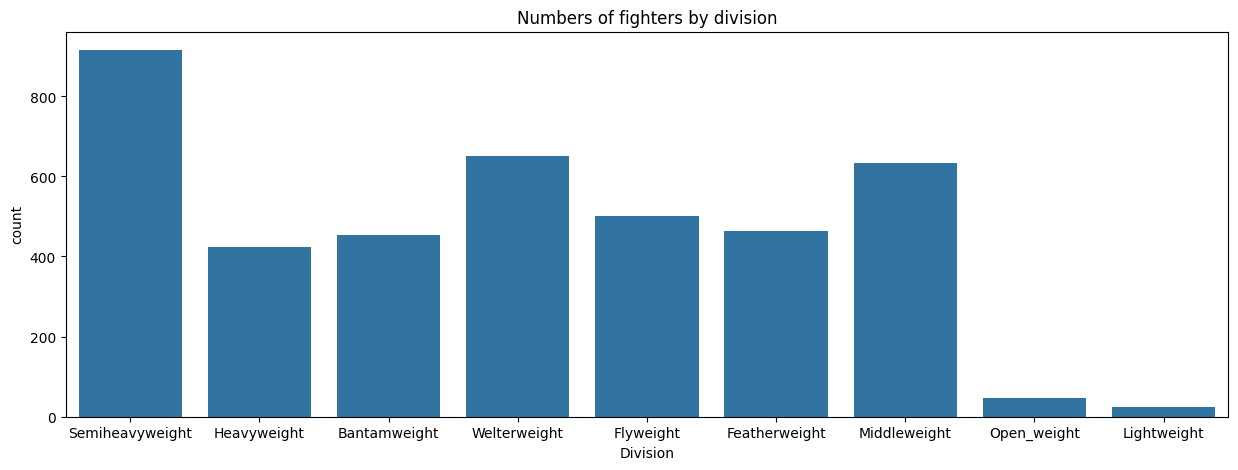

In [ ]:
df["Division"].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(data=df,x="Division")
plt.title("Numbers of fighters by division")
plt.show()

## 2. What is the predominant Stance in each division?

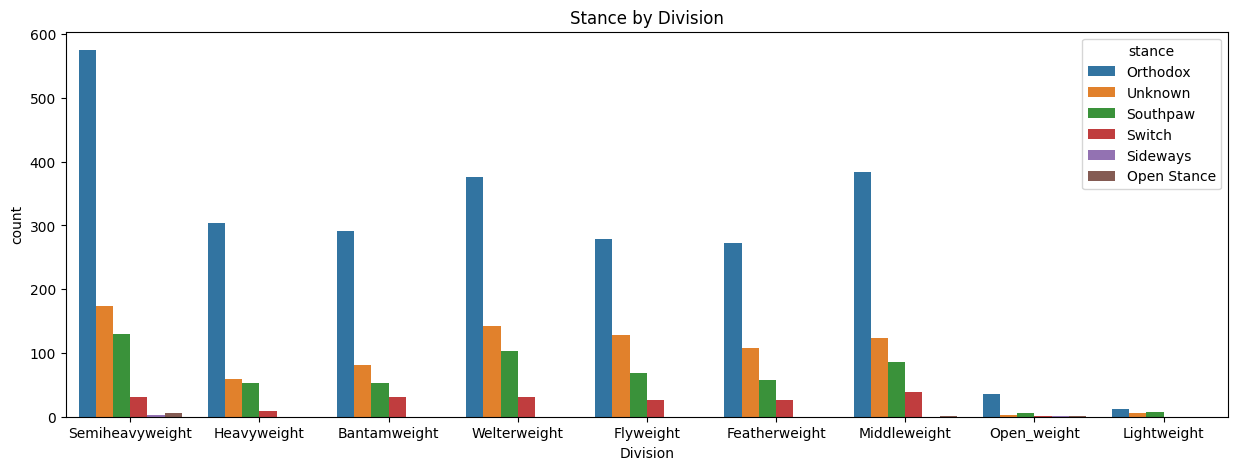

In [ ]:
df.groupby("Division")["stance"].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(data=df,x="Division",hue="stance")
plt.title("Stance by Division")
plt.show()

## 3. What is the average height in each division?

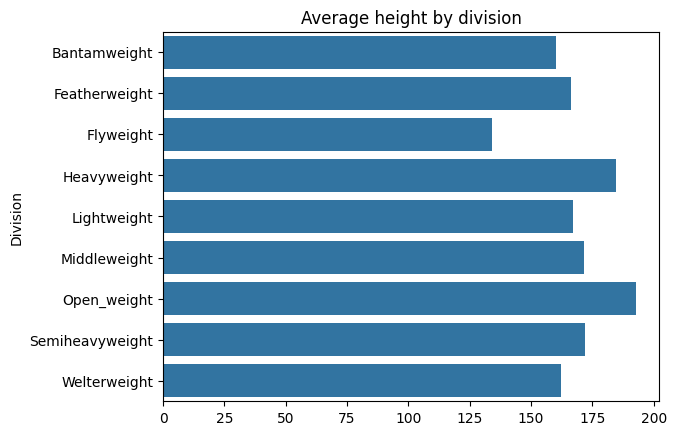

In [ ]:
Height_Average = df.groupby("Division")["height_cm"].mean().round(2)
sns.barplot(y=Height_Average.index, x=Height_Average.values)
plt.title("Average height by division")
plt.show()

## 4. Relationship between significant strikes landed and absorbed per minute by division (average)

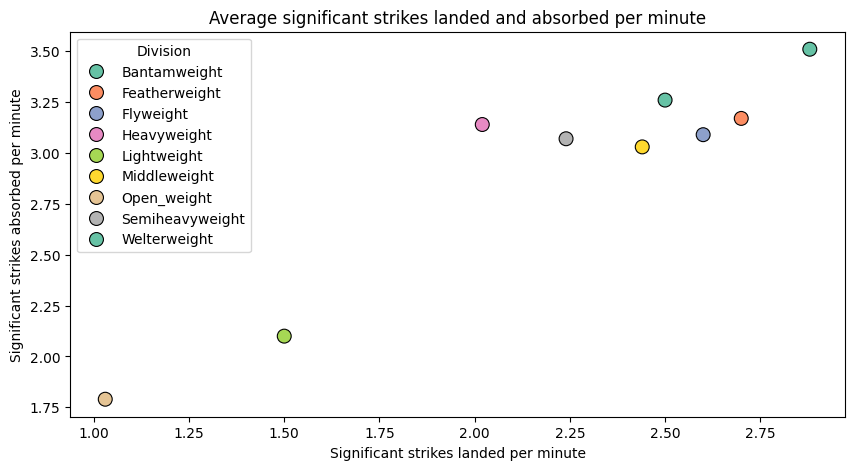

In [ ]:
Significant_strikes = df.groupby("Division")[["significant_strikes_landed_per_minute",
                        "significant_strikes_absorbed_per_minute"]].mean().round(2)
plt.figure(figsize=(10,5))
sns.scatterplot(data=Significant_strikes,x="significant_strikes_landed_per_minute",
                                         y= "significant_strikes_absorbed_per_minute",
                                         hue="Division",palette="Set2",
                                         s=100, edgecolor="black")
plt.title("Average significant strikes landed and absorbed per minute")
plt.xlabel("Significant strikes landed per minute")
plt.ylabel("Significant strikes absorbed per minute")
plt.show()

## 5. Relationship between takedown accuracy and takedown defense by division (average)

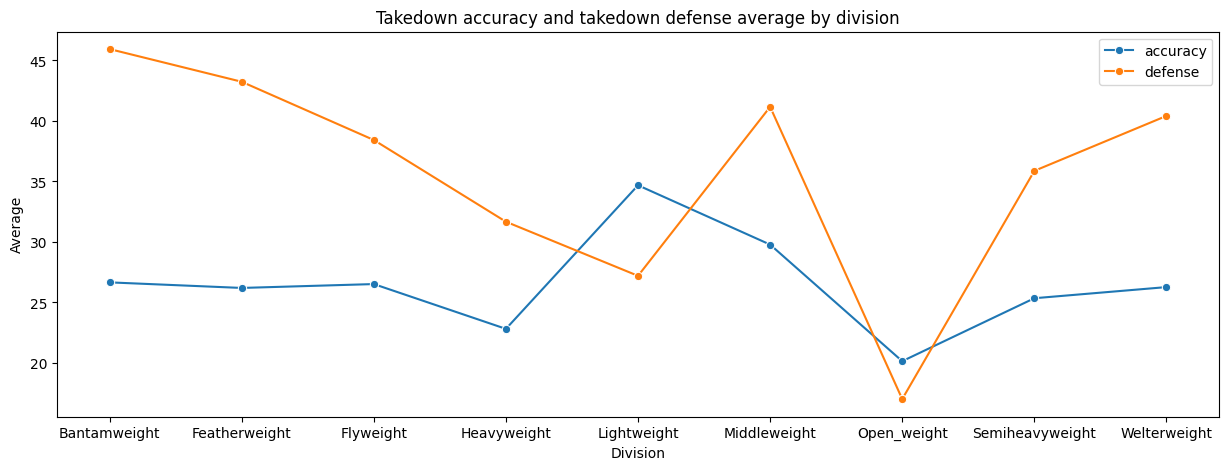

In [ ]:
Takedown=df.groupby("Division")[["takedown_accuracy",
                     "takedown_defense"]].mean().round(2)
plt.figure(figsize=(15,5))
sns.lineplot(data=Takedown,x="Division",y="takedown_accuracy", label="accuracy",marker="o")
sns.lineplot(data=Takedown,x="Division",y="takedown_defense", label="defense",marker="o")
plt.title("Takedown accuracy and takedown defense average by division")
plt.xlabel("Division")
plt.ylabel("Average")
plt.show()

## 6. What are the characteristics (average) of fighters with more than 20 victories?

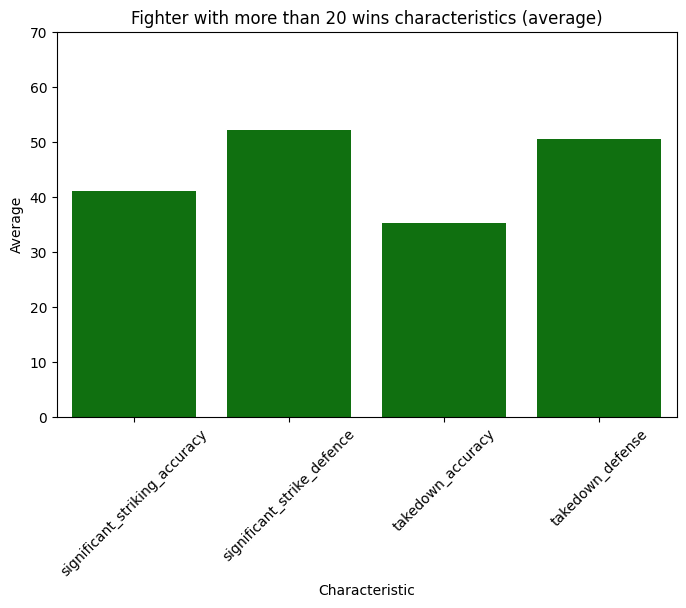

In [ ]:
Fighter = df.loc[df["wins"]>=20]
Characteristic=Fighter[["significant_striking_accuracy","significant_strike_defence",
         "takedown_accuracy","takedown_defense",]].mean().round(2)
plt.figure(figsize=(8,5))
sns.barplot(x=Characteristic.index,y=Characteristic.values,color="green")
plt.title("Fighter with more than 20 wins characteristics (average)")
plt.xlabel("Characteristic")
plt.ylabel("Average")
plt.xticks(rotation=45)
plt.gca().set_ylim(0, 70)
plt.show()


## 7. Relationship between Stance and significant strikes accuracy

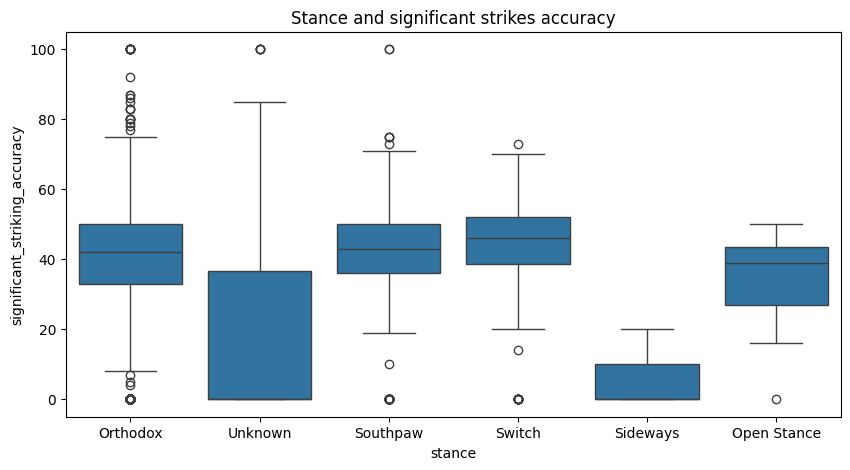

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x="stance",y="significant_striking_accuracy")
plt.title("Stance and significant strikes accuracy")
plt.show()


## 8. Which stance has the most victories in the Semiheavyweight division?

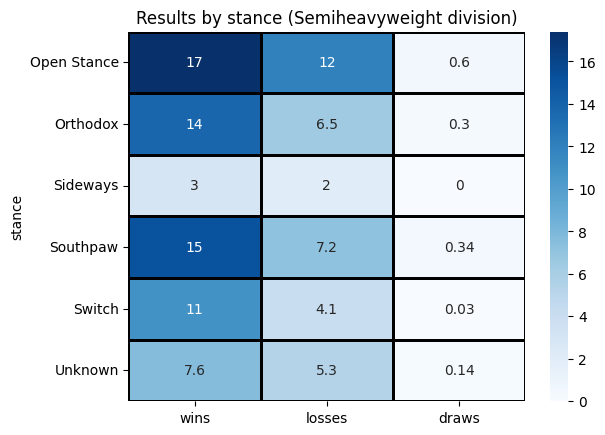

In [ ]:
Semiheavyweight=df[df["Division"]=="Semiheavyweight"]
Semi=Semiheavyweight.groupby("stance")[["wins","losses","draws"]].mean().round(2)
sns.heatmap(Semi,annot=True,cmap="Blues",linewidths=1,linecolor="black")
plt.title("Results by stance (Semiheavyweight division)")
plt.show()

## 9. Relationship between reach and significant strikes accuracy by division (average)

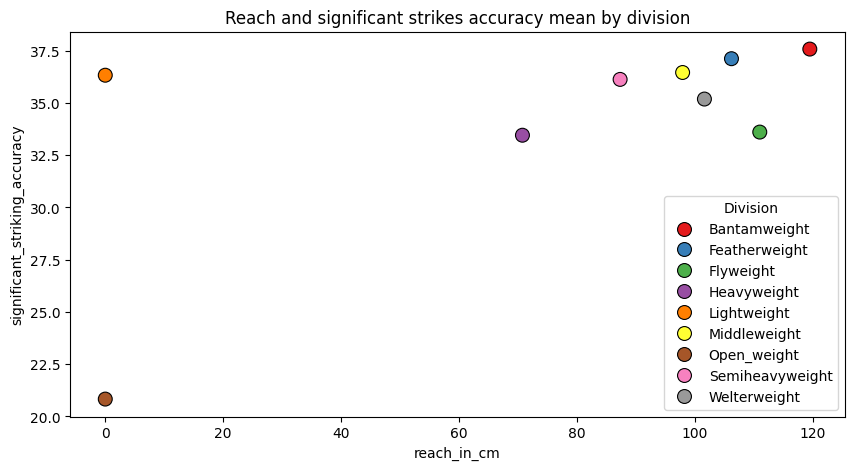

In [ ]:
# Reach and significant strikes accuracy mean by division

Relation=df.groupby("Division")[["reach_in_cm","significant_striking_accuracy"]].mean().round(2)
plt.figure(figsize=(10,5))
sns.scatterplot(data=Relation,x="reach_in_cm",y="significant_striking_accuracy",
                hue="Division",palette="Set1",s=100,edgecolor="black")
plt.title("Reach and significant strikes accuracy mean by division")
plt.show()